### Python for Computational Science Week by Neuromatch Academy
###### Reddit link: https://www.reddit.com/r/neuromatch/comments/1q64u9k/python_for_computational_science_week_feb_715/

#### Neuromatch Python Workshop 1: LIF Neuron Part I
###### link to workshop: https://compneuro.neuromatch.io/tutorials/W0D1_PythonWorkshop1/student/W0D1_Tutorial1.html

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

### Section 1: Python basics & the LIF model

In [2]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [3]:
# parameters
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


In [4]:
# simulation of the synaptic input I(t) to the neuron
step_end = 10
for step in range(step_end):  # take each integer value between 0 and 9
    t = step * dt
    i = i_mean * (1 + np.sin((2*np.pi*t)/0.01))
    print(f'{t:.3f} {i:.4e}')

0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10


In [5]:
# simulation of the synaptic input I(t) to the neuron
step_start = 0
step_end = 10
step = 1
for step in range(step_start, step_end, step):  # take each integer value between 0 and 9
    i = i_mean * (1 + np.sin((2*np.pi*t)/0.01))
    print(f'{t:.3f} {i:.4e}')

0.009 1.0305e-10
0.009 1.0305e-10
0.009 1.0305e-10
0.009 1.0305e-10
0.009 1.0305e-10
0.009 1.0305e-10
0.009 1.0305e-10
0.009 1.0305e-10
0.009 1.0305e-10
0.009 1.0305e-10


### Section 2: For loops & discrete time integration

In [7]:
for step in [0, 1, 2]:
  print(step)

for step in range(3):
  print(step)

start = 0
end = 3 # not included [0,1,2,3)
stepsize = 1

for step in range(start, end, stepsize):
  print(step)

0
1
2
0
1
2
0
1
2


In [13]:
# Simulating membrane potential with sin input
# parameters
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

# Initialize step_end and v0
step_end = 10
v = el
t = 0 

for step in range(step_end):
  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + (dt/tau)*(el - v + r * i)

  # Print value of t and v
  print(f"{t:.3f} {v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


### Section 3: Plotting

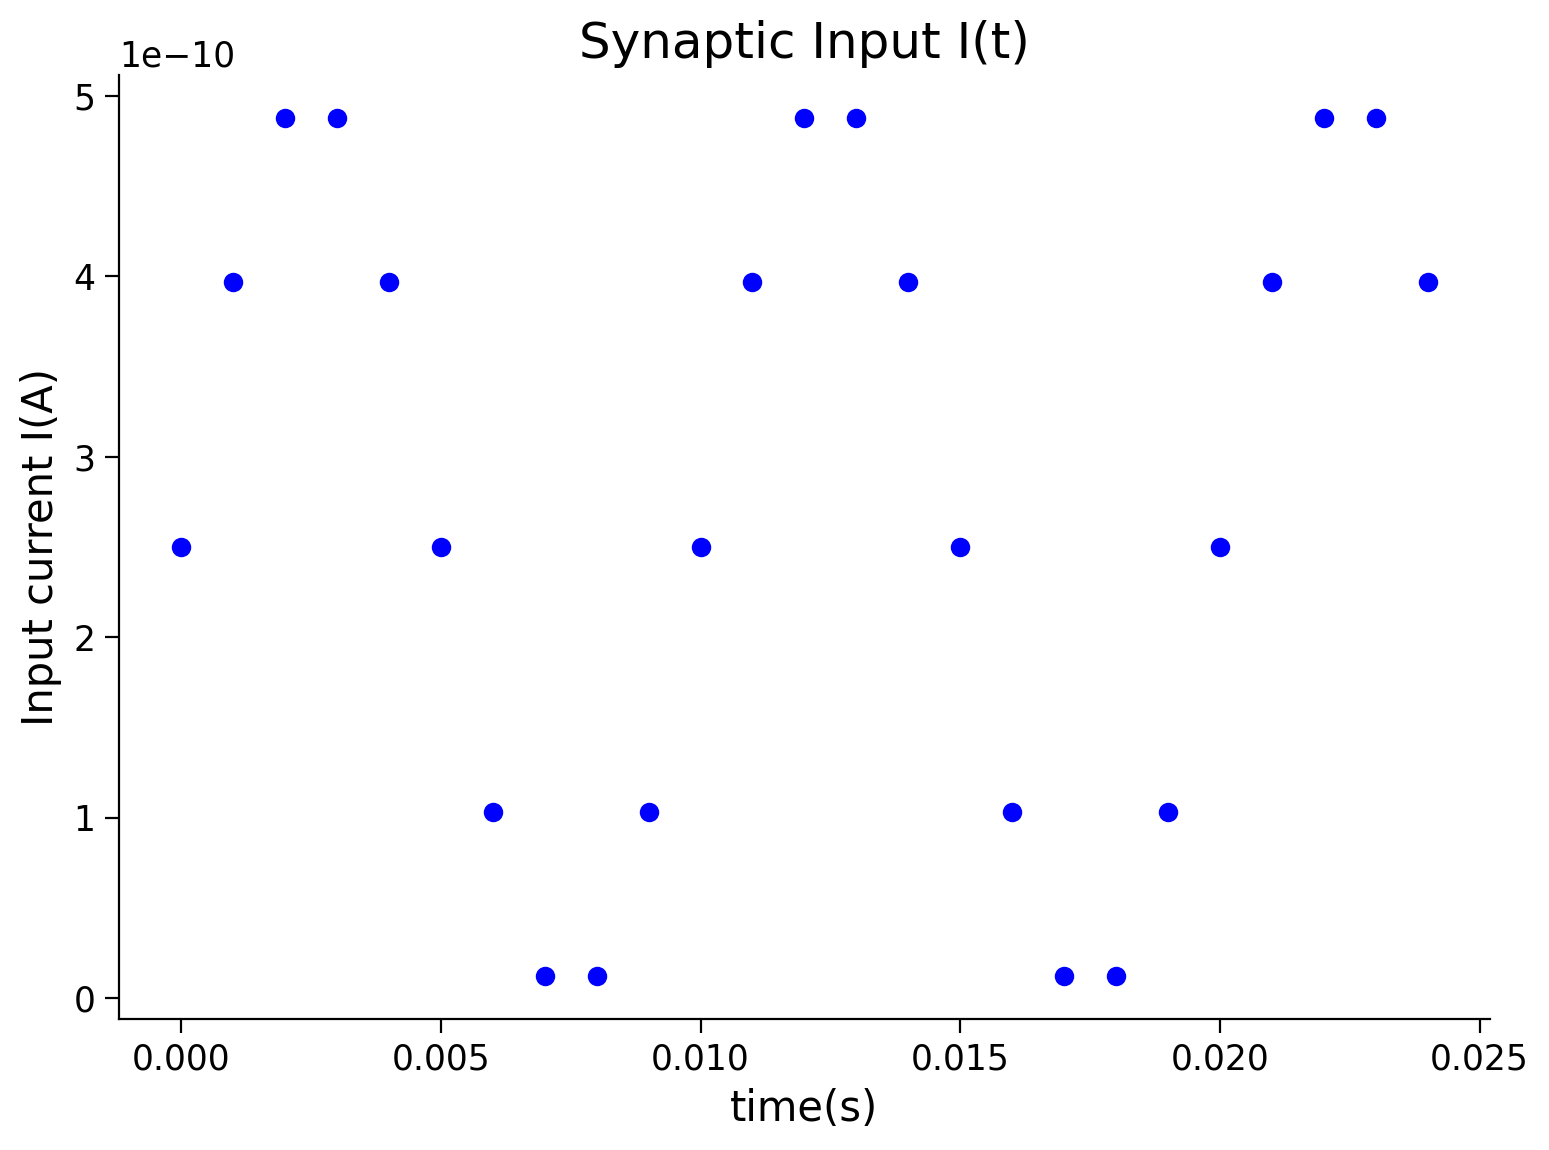

In [30]:
# Plotting current 

# Initialize step_end
dt = 0.001        # second
step_end = 25

# Initialize the figure
plt.figure()
plt.title("Synaptic Input I(t)")
plt.xlabel("time(s)")
plt.ylabel("Input current I(A)")

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t, i, 'bo')

# Display the plot
plt.show()

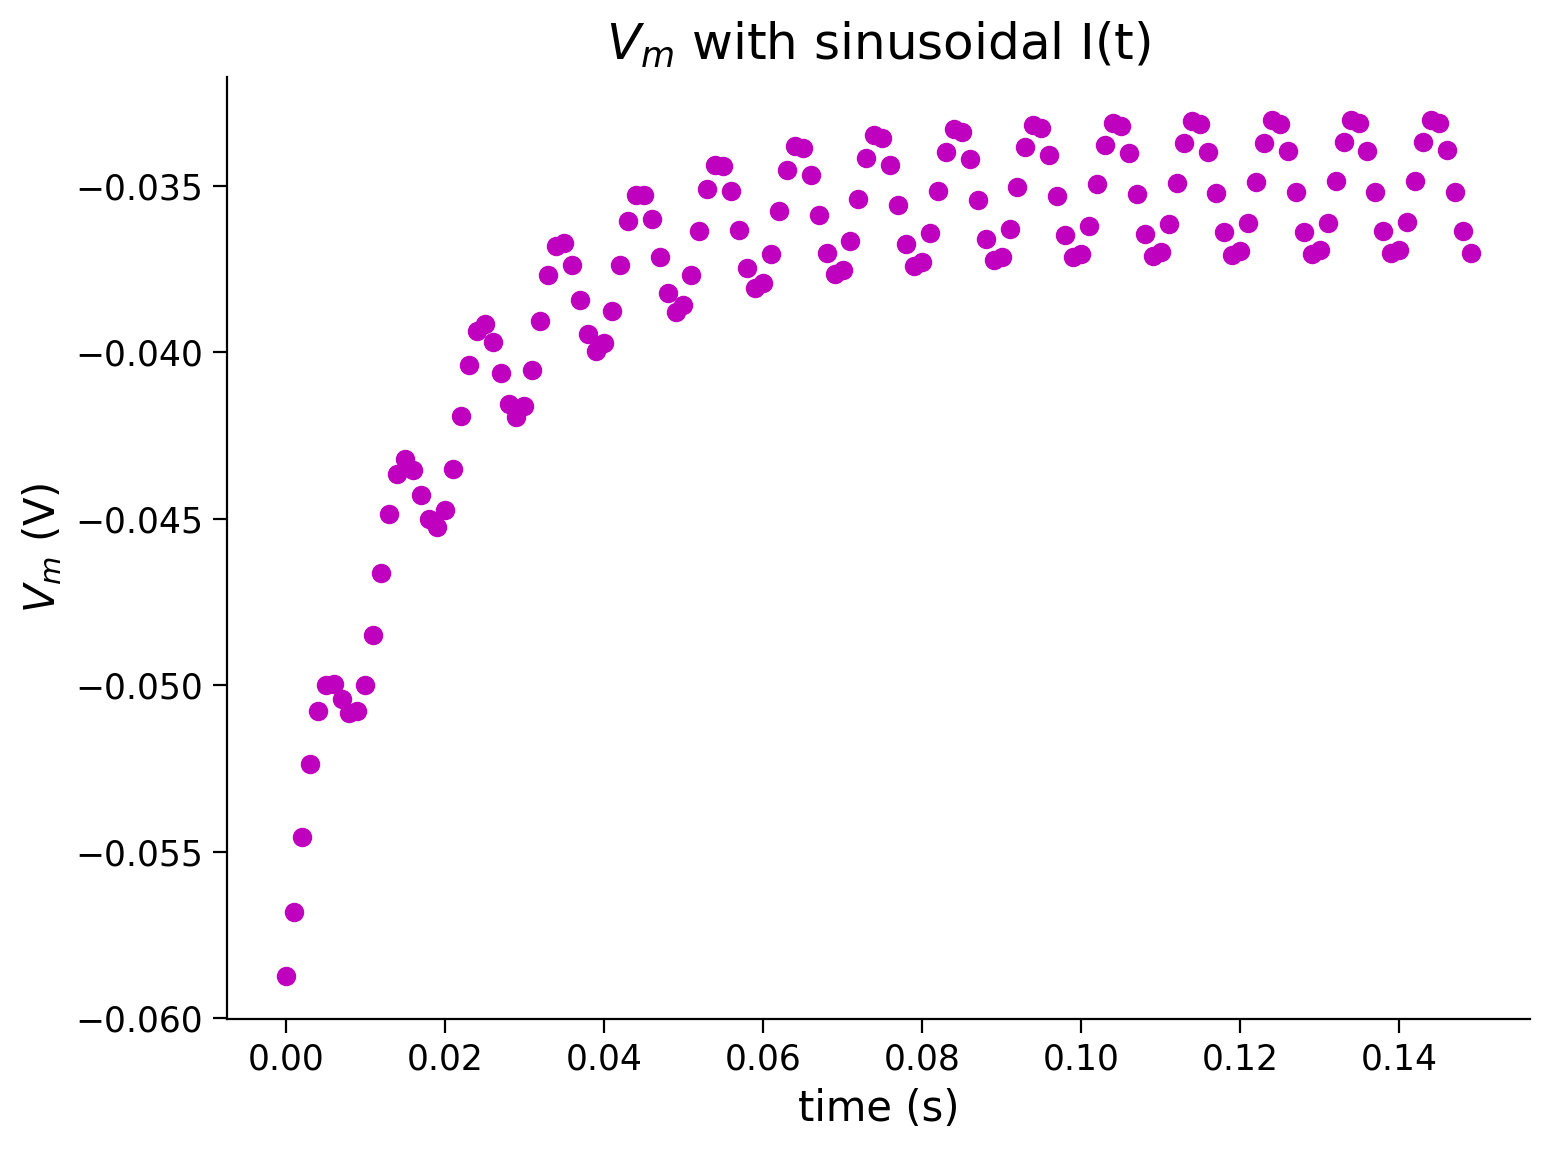

In [31]:
# plotting membrain potential 

step_end = int(t_max / dt)
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)');

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'mo')

# Display plot
plt.show()

### Section 4: Random synaptic input

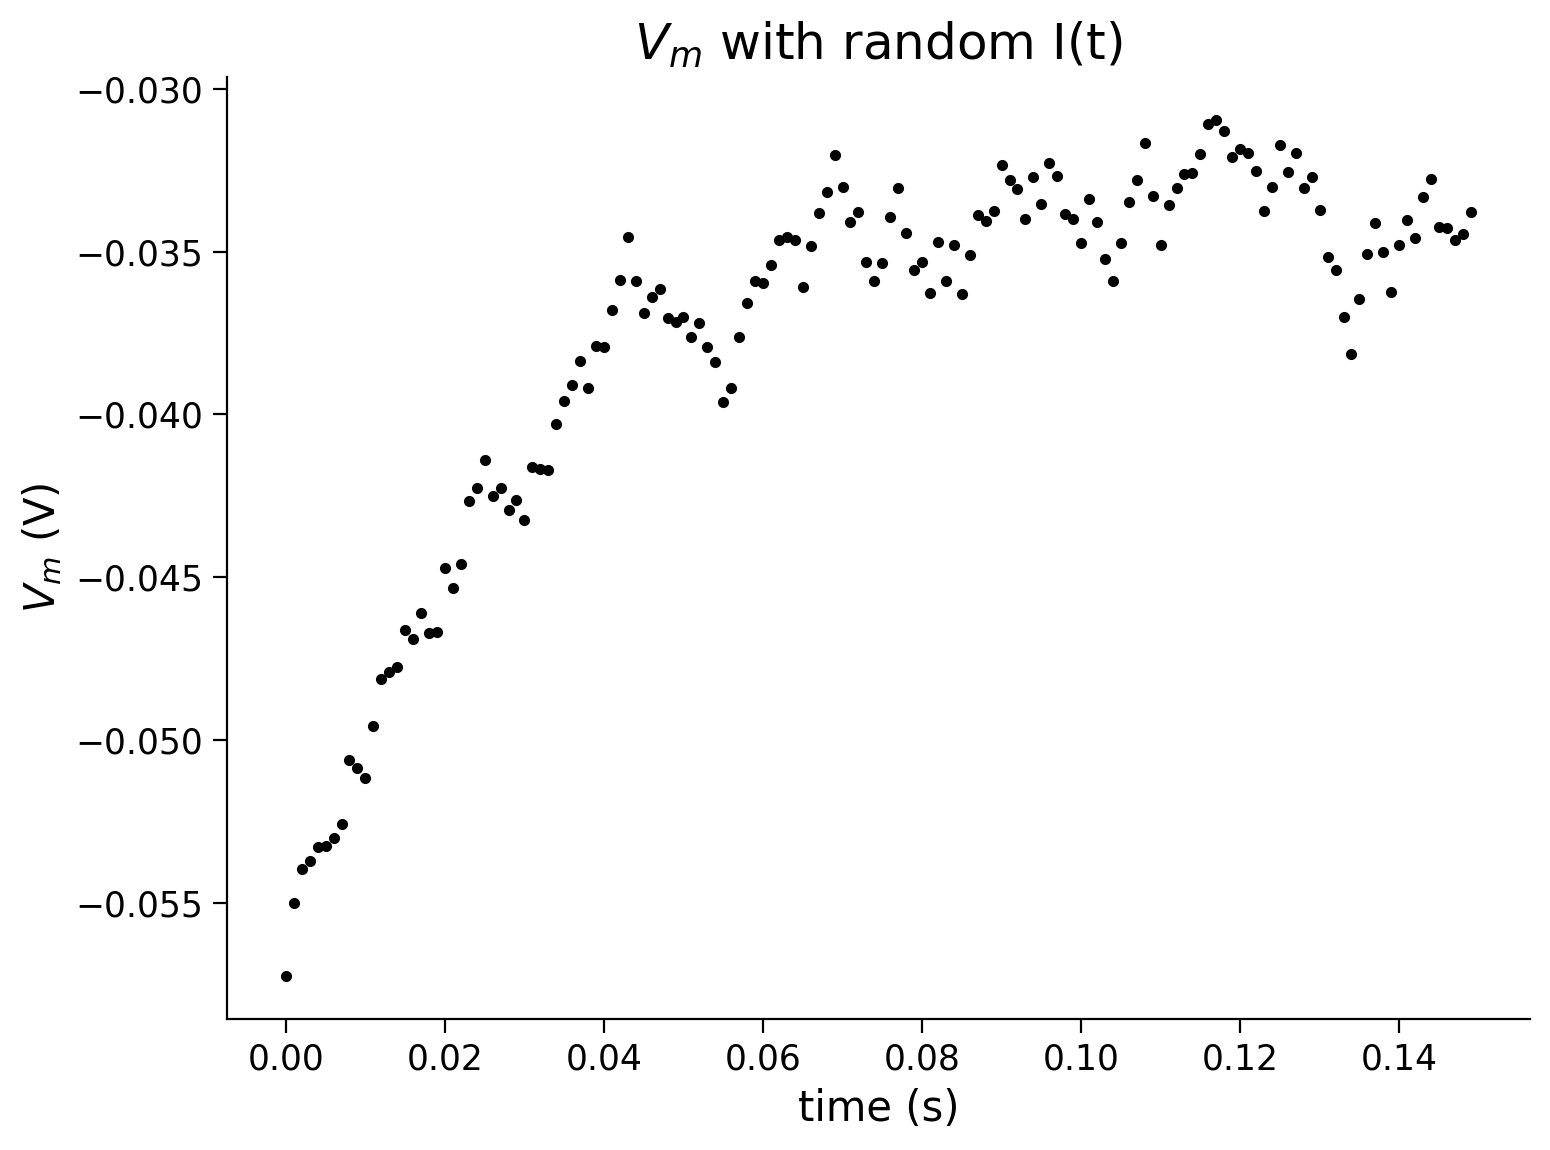

In [36]:
np.random.seed(2020)        # random number generator

step_end = int(t_max / dt)
v = el

plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Get random number in correct range of -1 to 1 (will need to adjust output of np.random.random)
  random_num = 2 * np.random.random() - 1 # bcz np.random.random() generates samples from the uniform distr-n 0 and 1.

  # Compute value of i at this time step
  i = i_mean * (1 + 0.1 * np.sqrt(t_max/dt) * random_num)

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')


# Display plot
plt.show()

### Section 5: Lists & ensemble statistics

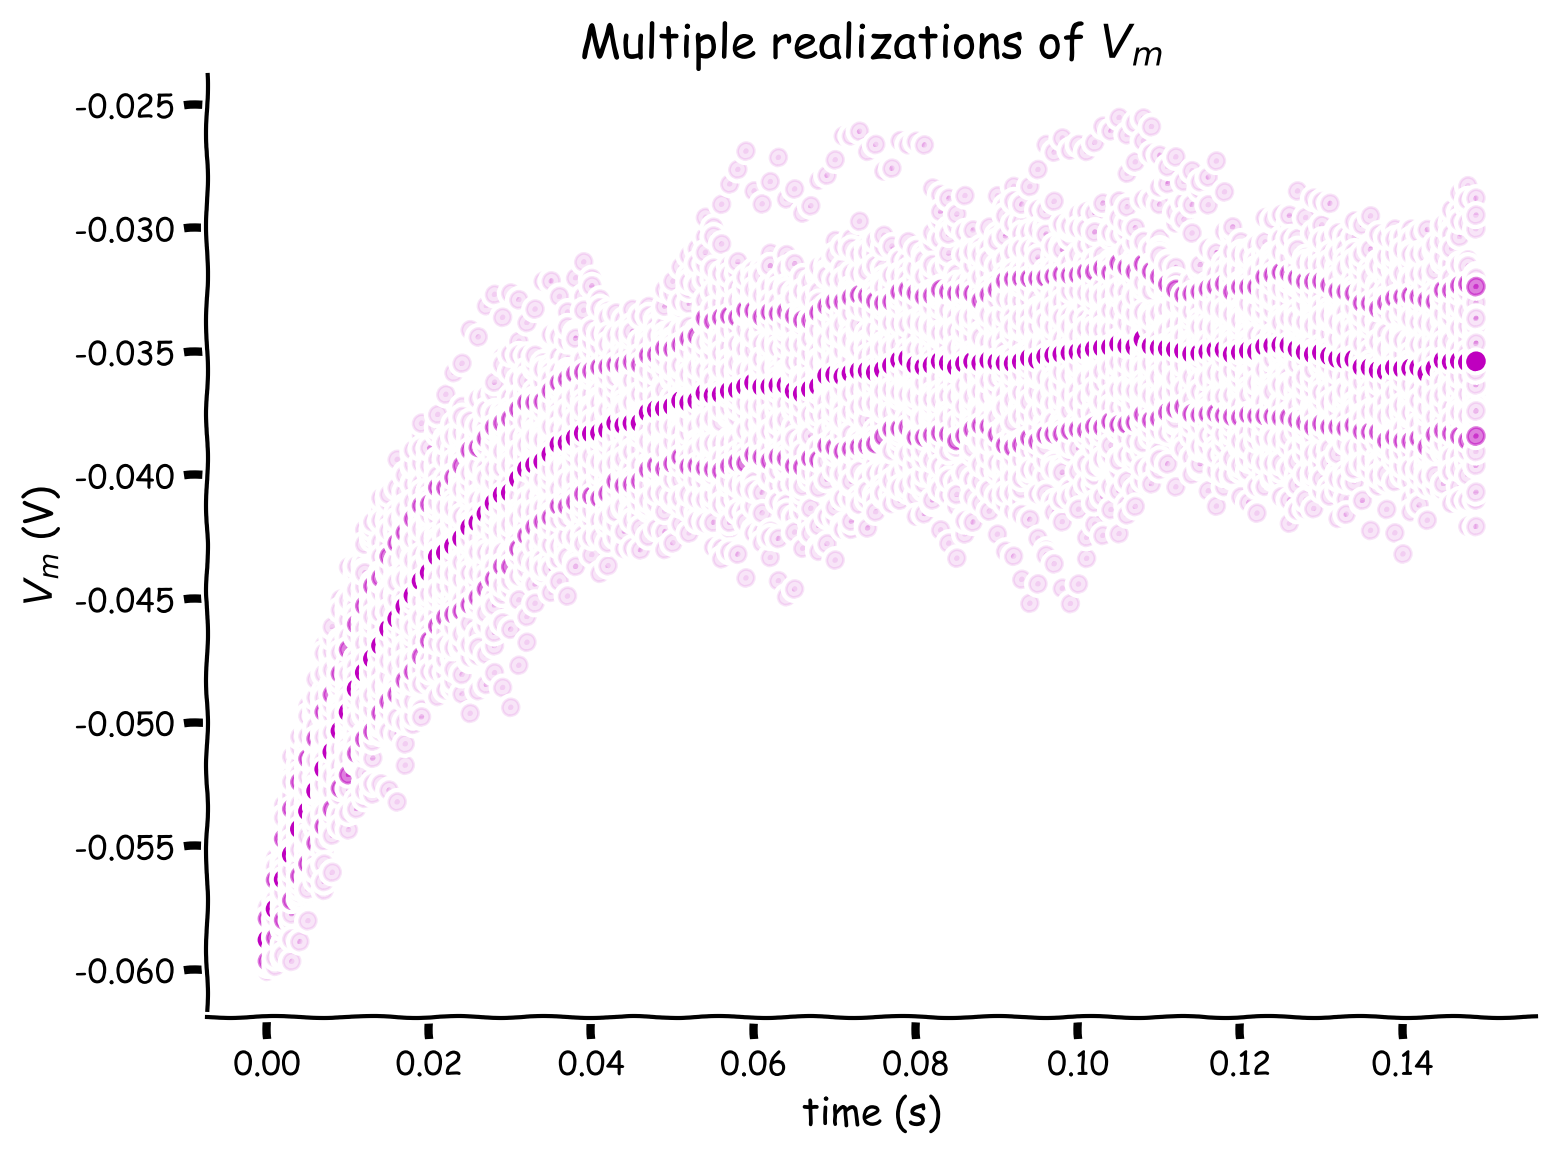

In [57]:
# random number generator
np.random.seed(2020)

step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  for step in range(step_end):
    t = step * dt
    for j in range(0, n):
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
      
      # Compute value of v for this simulation
      v_n[j] = v_n[j] + dt/tau * (el - v_n[j] + r*i)

    v_mean = sum(v_n) / n # mean 
    v_var_n = [(v - v_mean)**2 for v in v_n] # 
    v_var = sum(v_var_n)/(n - 1) # sample variance v_var by summing values of v_var_n with sum and dividing by n-1
    v_std = np.sqrt(v_var) # standard deviation

    plt.plot([t]* n, v_n, 'mo', alpha=0.1)
    plt.plot(t, v_mean, 'mo', alpha=1)
    plt.plot(t, v_mean + v_std, 'mo', alpha=0.5)
    plt.plot(t, v_mean - v_std, 'mo', alpha=0.5)
  # Display plot
  plt.show()